# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | horta
Processing Record 3 of Set 1 | urangan
Processing Record 4 of Set 1 | palikir - national government center
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | martapura
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | lingyuan
Processing Record 9 of Set 1 | yarmouth
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | nar'yan-mar
Processing Record 13 of Set 1 | ola
Processing Record 14 of Set 1 | dayapar
City not found. Skipping...
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | sisimiut
Processing Record 17 of Set 1 | keflavik
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | aland
Processing Record 20 of Set 1 | serov
Processing Record 21 of Set 1 | wailua homesteads
Proce

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,20.25,28,20,8.23,CL,1736277384
1,horta,38.5333,-28.6333,17.23,72,40,12.35,PT,1736277488
2,urangan,-25.3000,152.9000,23.70,62,0,3.56,AU,1736277617
3,palikir - national government center,6.9248,158.1611,27.41,78,100,3.60,FM,1736277618
4,margaret river,-33.9500,115.0667,14.19,88,100,2.97,AU,1736277619


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,20.25,28,20,8.23,CL,1736277384
1,horta,38.5333,-28.6333,17.23,72,40,12.35,PT,1736277488
2,urangan,-25.3000,152.9000,23.70,62,0,3.56,AU,1736277617
3,palikir - national government center,6.9248,158.1611,27.41,78,100,3.60,FM,1736277618
4,margaret river,-33.9500,115.0667,14.19,88,100,2.97,AU,1736277619


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

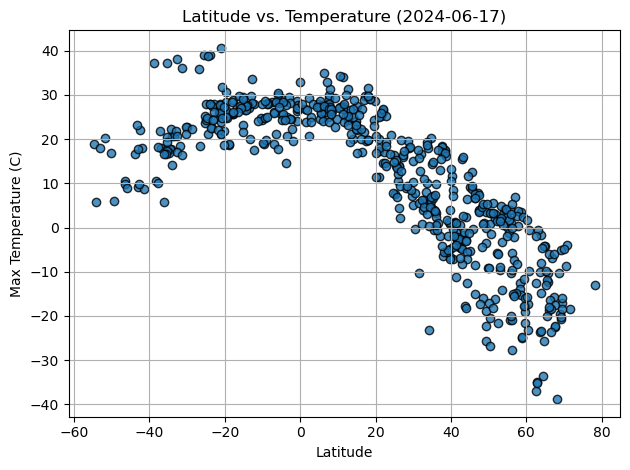

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

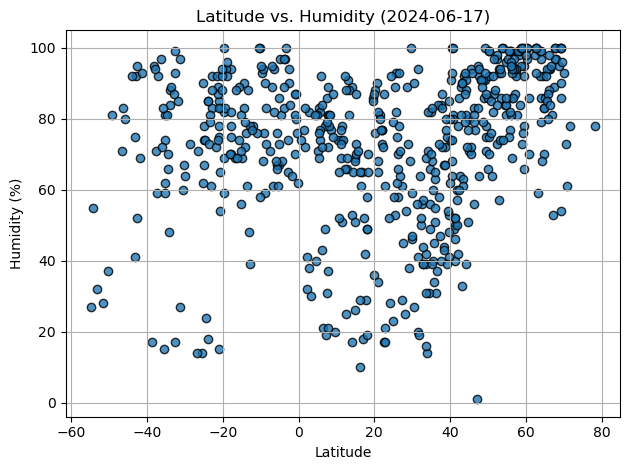

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

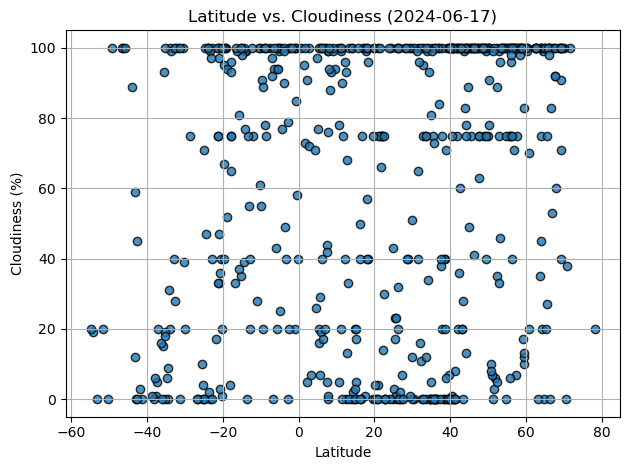

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

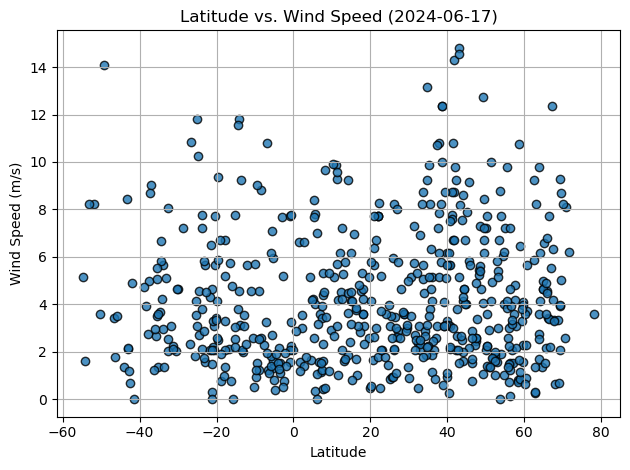

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = slope * x + intercept
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,horta,38.5333,-28.6333,17.23,72,40,12.35,PT,1736277488
3,palikir - national government center,6.9248,158.1611,27.41,78,100,3.60,FM,1736277618
7,lingyuan,41.2400,119.4011,-11.11,40,8,7.76,CN,1736277622
8,yarmouth,41.7057,-70.2286,-2.80,57,100,14.31,US,1736277623
10,ilulissat,69.2167,-51.1000,-4.99,54,40,2.06,GL,1736277625


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,20.25,28,20,8.23,CL,1736277384
2,urangan,-25.3000,152.9000,23.70,62,0,3.56,AU,1736277617
4,margaret river,-33.9500,115.0667,14.19,88,100,2.97,AU,1736277619
5,martapura,-3.4167,114.8500,25.05,100,40,1.54,ID,1736277620
6,adamstown,-25.0660,-130.1015,24.27,74,71,3.08,PN,1736277621


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7549912367852633


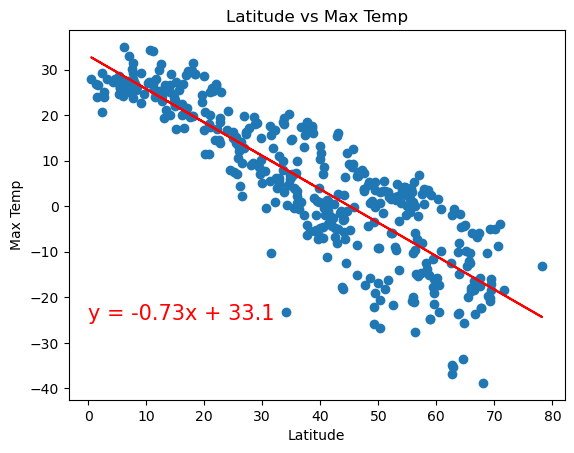

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Find the slope
slope = linregress(x_values, y_values)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(0,-25),fontsize=15,color="red")

# Print r^2-value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.2437744770235865


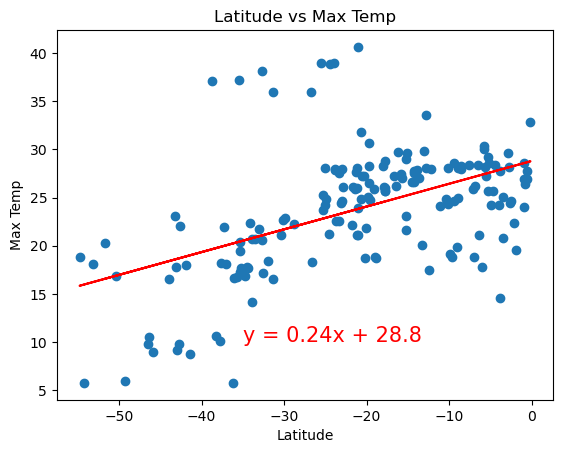

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Find the slope
slope = linregress(x_values, y_values)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-35,10),fontsize=15,color="red")

# Print r^2-value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear relationship for Latitude vs Max Temperature between the Southern Hemisphere graph and the Northern Hemisphere graph is that the Northern hemisphere graph has a strong negative correlation with a r^2-value of around 0.75 and the Southern hemisphere graph has a weak positive correlation with a r^2-value around 0.24.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.1946878571472026


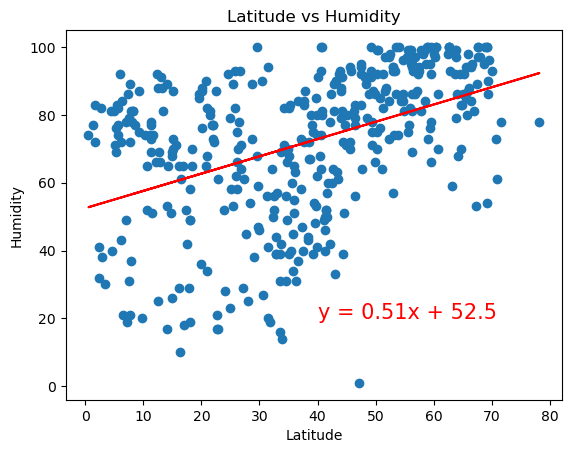

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Find the slope
slope = linregress(x_values, y_values)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r^2-value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.07025034803068331


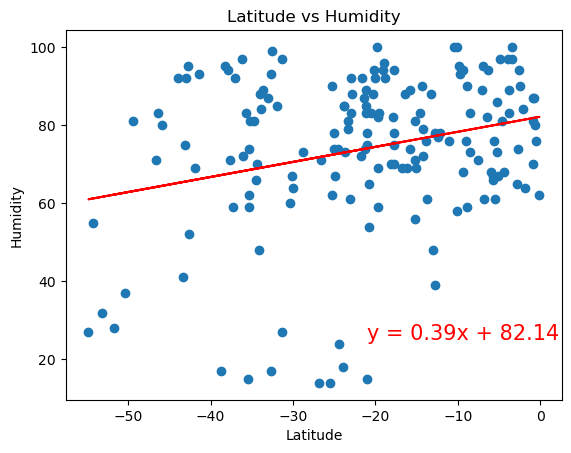

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Find the slope
slope = linregress(x_values, y_values)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-21,25),fontsize=15,color="red")

# Print r^2-value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear relationship for Latitude vs Humidity between the Southern Hemisphere graph and the Northern Hemisphere graph is that the Northern Hemisphere graph has a slightly positive correlation with a r^2-value around 0.19 and the Southern Hemisphere graph appears to have no correlation with a r^2-value around 0.07. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.04692325118162066


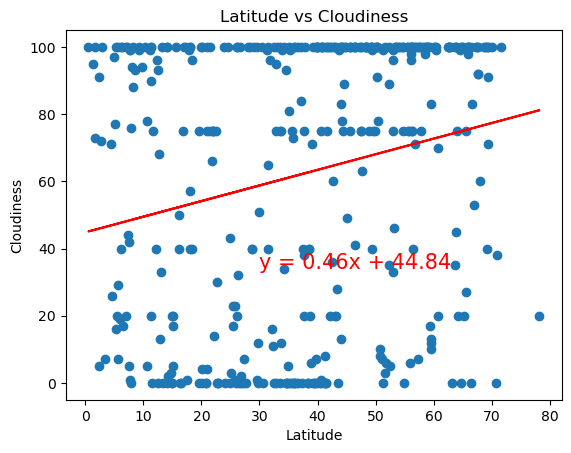

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Find the slope
slope = linregress(x_values, y_values)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(30,34),fontsize=15,color="red")

# Print r^2-value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.14174109773585195


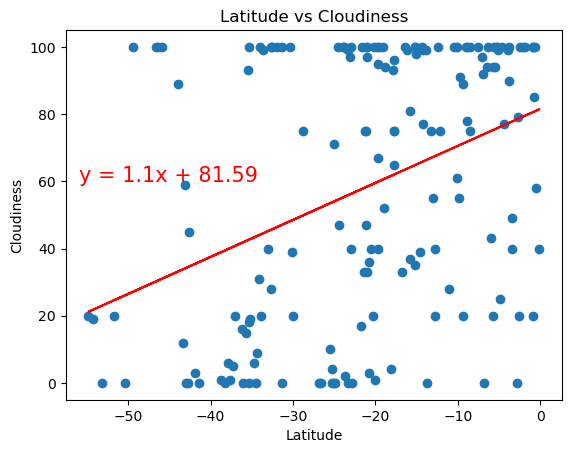

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Find the slope
slope = linregress(x_values, y_values)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-56,60),fontsize=15,color="red")

# Print r^2-value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear relationship for Latitude vs Cloudiness between the Southern Hemisphere graph and the Northern Hemisphere graph is that they both appear to have no correlation really. The Southern hemisphere graph has a r^2-value around 0.14 and the Northern hemisphere graph has a r^2-value around 0.05. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0020829533168895183


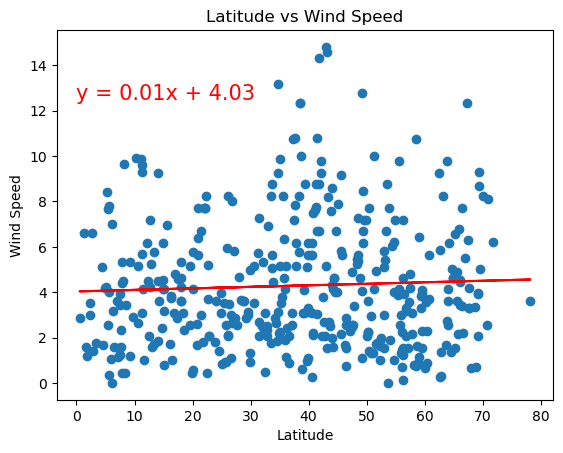

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Find the slope
slope = linregress(x_values, y_values)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(0,12.5),fontsize=15,color="red")

# Print r^2-value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.02419484743394142


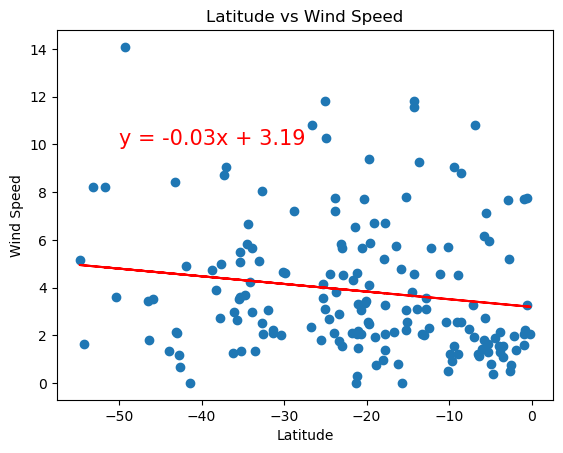

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Find the slope
slope = linregress(x_values, y_values)

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Print r^2-value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear relationship for Latitude vs Wind Speed between the Southern Hemisphere graph and the Northern Hemisphere graph is there appears to be no correlation for both graphs. The Southern hemisphere graph has a r^2-value of 0.02 and the Northern hemisphere graph has a r^2-value of 0.00. 